In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [125]:
df = pd.read_csv('M:\TRAINING\CODING_DOJO\Project 01\sales-predictions\sales_predictions_clean.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Outlet_Identifier,,,,
OUT049,1999,Medium,Tier 1,Supermarket Type1
OUT018,2009,Medium,Tier 3,Supermarket Type2
OUT010,1998,Unknown,Tier 3,Grocery Store
OUT013,1987,High,Tier 3,Supermarket Type1
OUT027,1985,Medium,Tier 3,Supermarket Type3
OUT045,2002,Unknown,Tier 2,Supermarket Type1
OUT017,2007,Unknown,Tier 2,Supermarket Type1
OUT046,1997,Small,Tier 1,Supermarket Type1
OUT035,2004,Small,Tier 2,Supermarket Type1


### OBJECTIVE ###
I am looking to make a new df based not on the items but based on the outlet and sum the total sales and see if there are any corilations between outlet location or type to tell us why some are successful and others not so much.

first thought on df

Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Outlet_Sales_Total

### Starting Out ###
I am going to start by identifing the number of stores or outlets their are by getting a list of unique values out of the Outlet_Identifier col.

In [119]:
Outlets_List = list(dict(df['Outlet_Identifier'].value_counts()).keys())
Outlets_Year = dict(df['Outlet_Identifier'].value_counts())
# Outlets_List
Outlets_Year

{'OUT027': 935,
 'OUT013': 932,
 'OUT049': 930,
 'OUT035': 930,
 'OUT046': 930,
 'OUT045': 929,
 'OUT018': 928,
 'OUT017': 926,
 'OUT010': 555,
 'OUT019': 528}

In [105]:
# Outlets_Year = 
# list(dict(df))
# Outlets_Year = dict(df['Outlet_Identifier'].value_counts())
# Outlets_Year
# for i in df['Outlet_Identifier']:
# #     print(i)
#     for i2 in Outlets_List:
#         if i == i2:
#             continue
# #             print('they match')
#         else:
#             continue
# print('next i')
#     if i == Outlets_List[0]:
#         print(df['Outlet_Establishment_Year'])
df['Outlet_Identifier']

0       OUT049
1       OUT018
2       OUT049
3       OUT010
4       OUT013
         ...  
8518    OUT013
8519    OUT045
8520    OUT035
8521    OUT018
8522    OUT046
Name: Outlet_Identifier, Length: 8523, dtype: object

In [122]:
for i in Outlets_List:
    print(i)
    print()
    for row in df['Outlet_Identifier']:
#         print(row)
        if i == row:
            index = list(df['Outlet_Identifier']).index(i)
            df['Outlet_Establishment_Year'][index]
#             Outlets_Year[i] = df['Outlet_Establishment_Year'][index]
#             Outlets_Year
#             print('done')
        else:
            continue

OUT027

OUT013

OUT049

OUT035

OUT046

OUT045

OUT018

OUT017

OUT010

OUT019



In [93]:
Outlet_0 = df[df['Outlet_Identifier'] == Outlets_List[0]][['Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']]
# Outlet_0
# Outlet_0.Index(['Outlet_Identifier'])

In [90]:
Outlet_0['Item_Outlet_Sales'].sum()

3453926.0514

In [110]:
Outlets_Data = {'Outlet_Identifier': Outlets_List}
Outlets_Data
# pd.DataFrame(data = Outlets)
# pd.DataFrame({Outlets_List[0]: ['test', 'test2', 'test3']})
# pd.DataFrame

{'Outlet_Identifier': ['OUT027',
  'OUT013',
  'OUT049',
  'OUT035',
  'OUT046',
  'OUT045',
  'OUT018',
  'OUT017',
  'OUT010',
  'OUT019']}

In [142]:
Outlets_Data = df.set_index('Outlet_Identifier').drop(columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Item_Outlet_Sales'])
Outlets_Data.drop_duplicates(inplace = True)
Outlets_Data
# df['Outlet_Identifier'].nunique() ## THIS IS A GUT CHECK

,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Outlet_Identifier,,,,
OUT049,1999,Medium,Tier 1,Supermarket Type1
OUT018,2009,Medium,Tier 3,Supermarket Type2
OUT010,1998,Unknown,Tier 3,Grocery Store
OUT013,1987,High,Tier 3,Supermarket Type1
OUT027,1985,Medium,Tier 3,Supermarket Type3
OUT045,2002,Unknown,Tier 2,Supermarket Type1
OUT017,2007,Unknown,Tier 2,Supermarket Type1
OUT046,1997,Small,Tier 1,Supermarket Type1
OUT035,2004,Small,Tier 2,Supermarket Type1


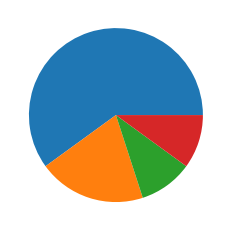

In [163]:
plt.figure()

# plt.plot(Outlets_Data['Outlet_Type'])
plt.pie(Outlets_Data['Outlet_Type'].value_counts())

# plt.legend()

plt.show()